<a href="https://colab.research.google.com/github/grissharrisdennis/Machine-learning-Projects/blob/main/TransactionData_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df1=pd.read_csv('/content/drive/MyDrive/Usecase_DemadForecasting/Transactional_data_retail_01.csv')
df2=pd.read_csv('/content/drive/MyDrive/Usecase_DemadForecasting/Transactional_data_retail_02.csv')
custdemo=pd.read_csv('/content/drive/MyDrive/Usecase_DemadForecasting/CustomerDemographics.csv')
prodinfo=pd.read_csv('/content/drive/MyDrive/Usecase_DemadForecasting/ProductInfo.csv')

In [28]:
custdemo.head()

,Customer ID,Country
0,13085,United Kingdom
1,13078,United Kingdom
2,15362,United Kingdom
3,18102,United Kingdom
4,12682,France


In [29]:
prodinfo.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [52]:
transretail_data=pd.concat([df1,df2])

In [53]:
transretail_data.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,01 December 2021
1,489434,79323P,12,6.75,13085.0,01 December 2021
2,489434,79323W,12,6.75,13085.0,01 December 2021
3,489434,22041,48,2.10,13085.0,01 December 2021
4,489434,21232,24,1.25,13085.0,01 December 2021


In [54]:
transretail_mod_data=transretail_data.merge(prodinfo,on='StockCode',how='left')

In [55]:
transretail_mod_data.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Description
0,489434,85048,12,6.95,13085.0,01 December 2021,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,6.75,13085.0,01 December 2021,PINK CHERRY LIGHTS
2,489434,79323P,12,6.75,13085.0,01 December 2021,"Unsaleable, destroyed."
3,489434,79323P,12,6.75,13085.0,01 December 2021,NaN
4,489434,79323W,12,6.75,13085.0,01 December 2021,WHITE CHERRY LIGHTS


In [56]:
stock_total_quantity = transretail_mod_data.groupby('StockCode')['Quantity'].sum()
stock_total_quantity=stock_total_quantity.sort_values(ascending=False)
stock_total_quantity.head(10)

,Quantity
StockCode,
85123A,480330
85099B,382956
22197,317452
23084,245168
84879,242115
22423,206112
21181,201136
21212,190900
20713,168669


In [57]:
transretail_mod_data['TotalPrice'] = transretail_mod_data['Quantity'] * transretail_mod_data['Price']
transretail_mod_data.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Description,TotalPrice
0,489434,85048,12,6.95,13085.0,01 December 2021,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4
1,489434,79323P,12,6.75,13085.0,01 December 2021,PINK CHERRY LIGHTS,81.0
2,489434,79323P,12,6.75,13085.0,01 December 2021,"Unsaleable, destroyed.",81.0
3,489434,79323P,12,6.75,13085.0,01 December 2021,NaN,81.0
4,489434,79323W,12,6.75,13085.0,01 December 2021,WHITE CHERRY LIGHTS,81.0


In [64]:
stock_total_price = transretail_mod_data.groupby('StockCode')['TotalPrice'].sum()
stock_total_price=stock_total_price.sort_values(ascending=False)
top10_revenue_stocks=stock_total_price.head(10)
top10_revenue_stocks

,TotalPrice
StockCode,
22423,2622509.20
85123A,1268600.10
85099B,725114.04
DOT,645294.94
23084,534052.72
47566,443845.50
21181,406239.36
84879,394241.55
20713,368469.99


In [ ]:
!pip install dash
!pip install dash-core-components
!pip install dash-html-components
!pip install plotly

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

In [47]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

In [40]:
def adfuller_test(data):
  adf_test = adfuller(data)
  print(f'ADF Statistic: {adf_test[0]}')
  print(f'p-value: {adf_test[1]}')

  if adf_test[1] > 0.05:
    print("The series is not stationary. Differencing is needed.")
  else:
    print("The series is stationary.")

In [69]:
time_series_dict={}
for top_stock in top10_revenue_stocks.index:
  product_data = transretail_mod_data[transretail_mod_data['StockCode'] == top_stock]
  product_time_series = product_data.groupby('InvoiceDate')['TotalPrice'].sum()
  product_time_series = product_time_series.sort_index()
  time_series_dict[top_stock] = product_time_series
  #adfuller_test(product_time_series)
  #product_time_series.plot(kind='line', figsize=(10, 6))

In [ ]:
# Display the first few entries for each stock's time series data
for stock_code, time_series in time_series_list.items():
    print(f"Time Series for Stock Code: {stock_code}")
    print(time_series.head())  # Show the first few rows of the time series
    print("\n")  # Add a new line for better readability


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

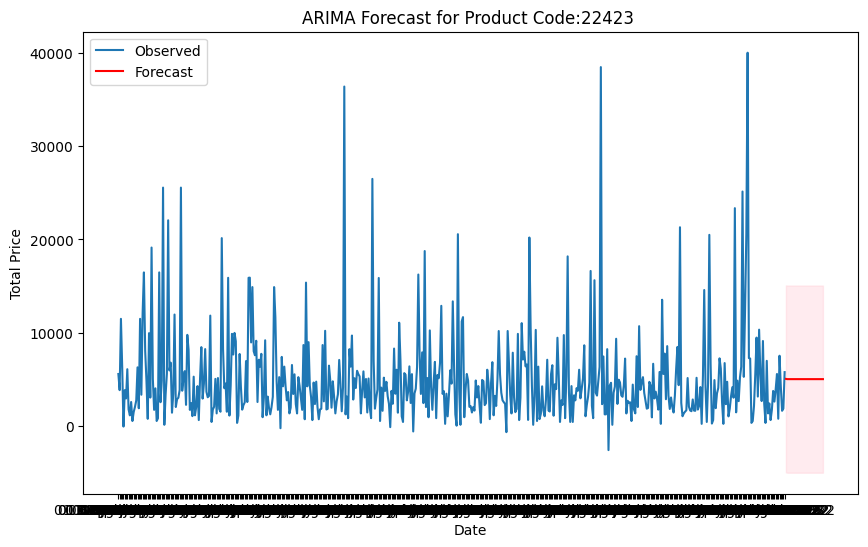

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

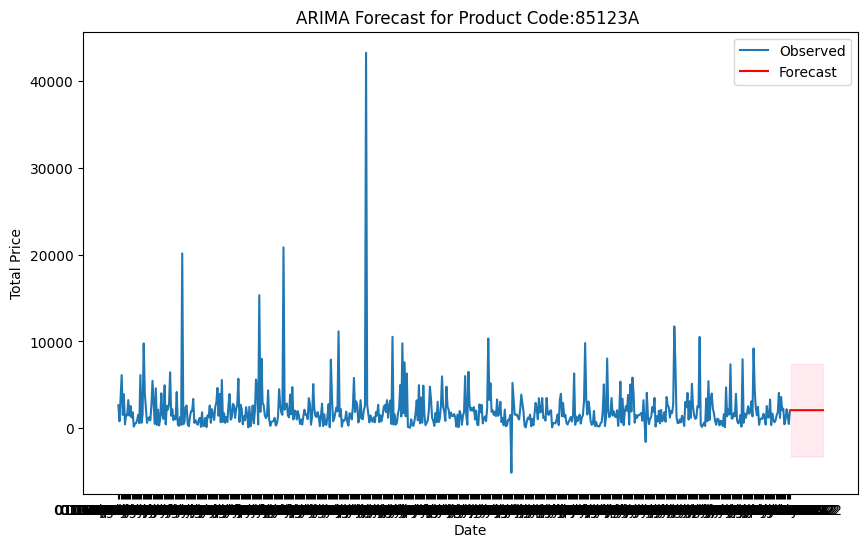

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

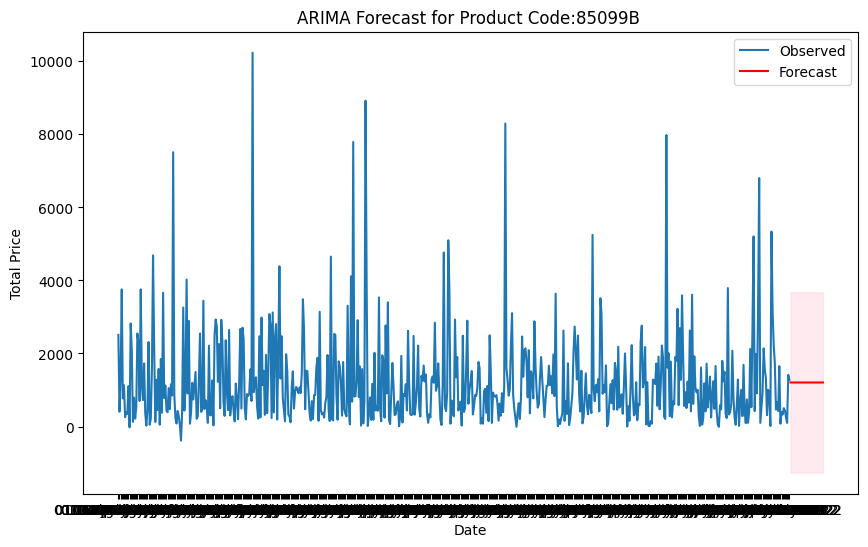

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

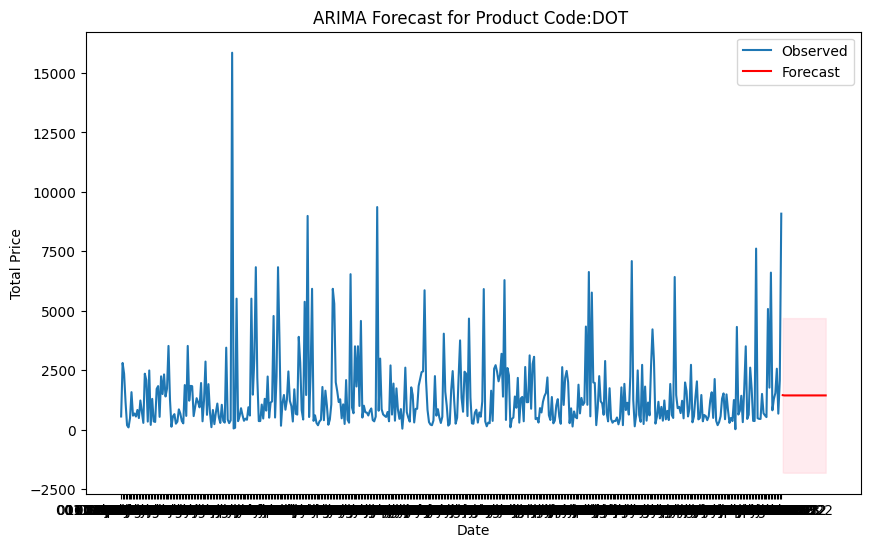

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

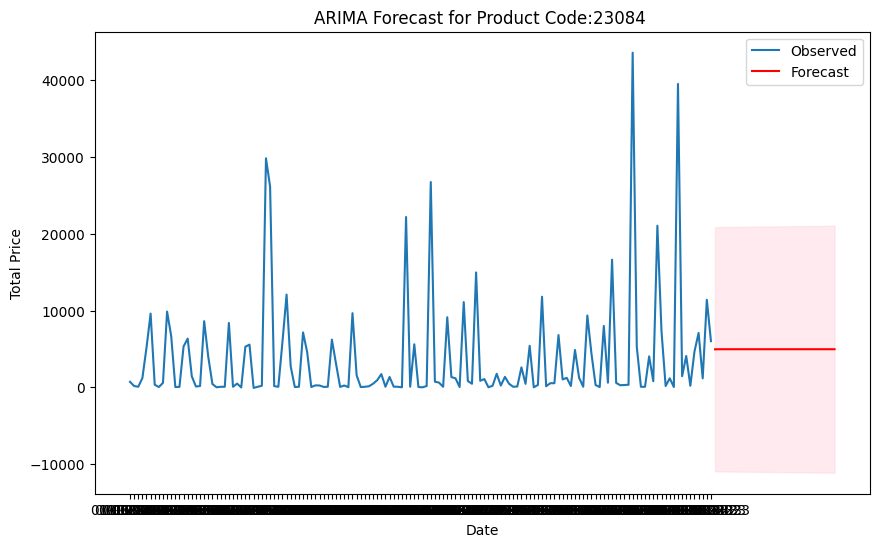

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

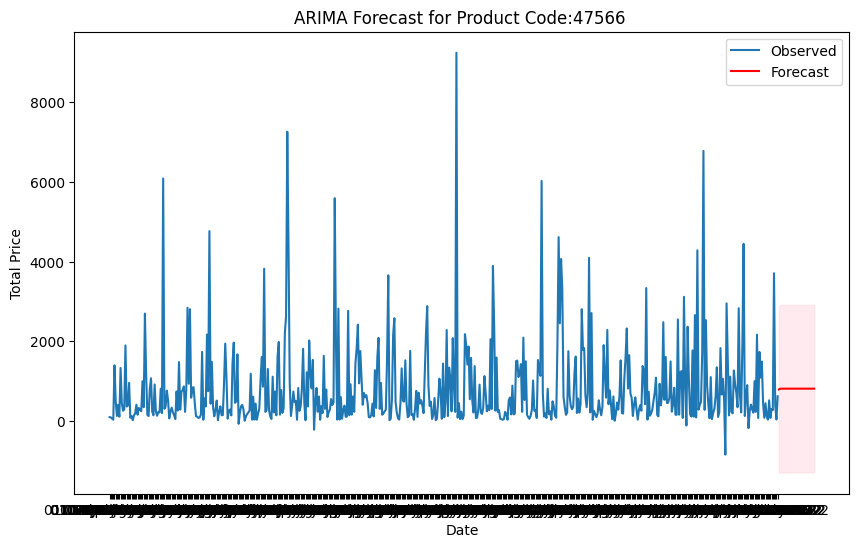

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

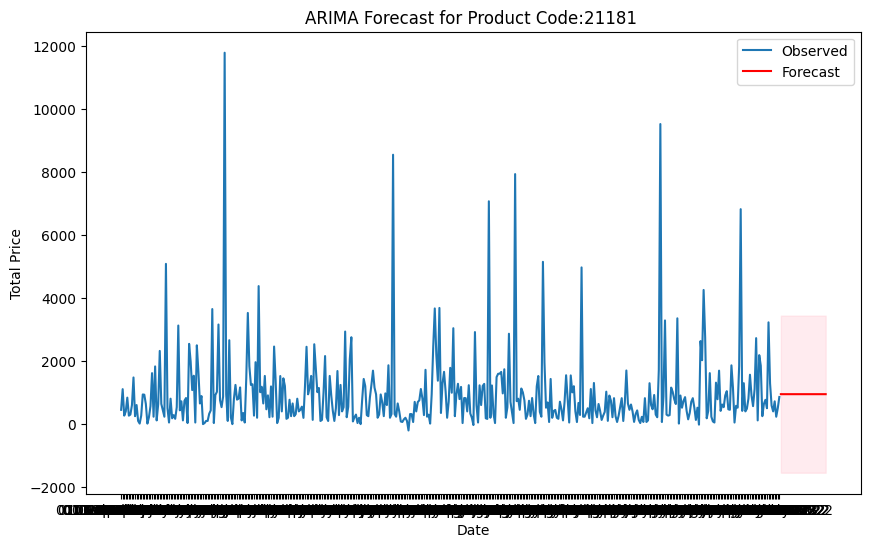

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

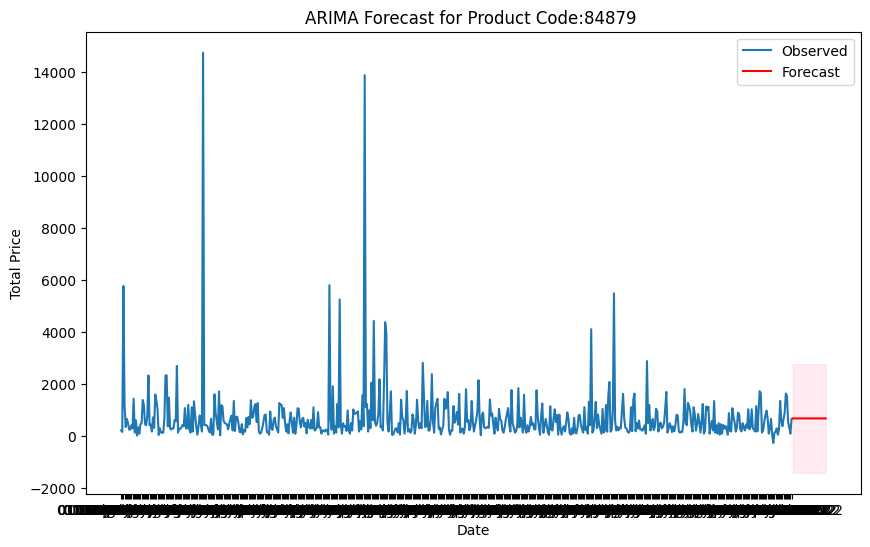

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

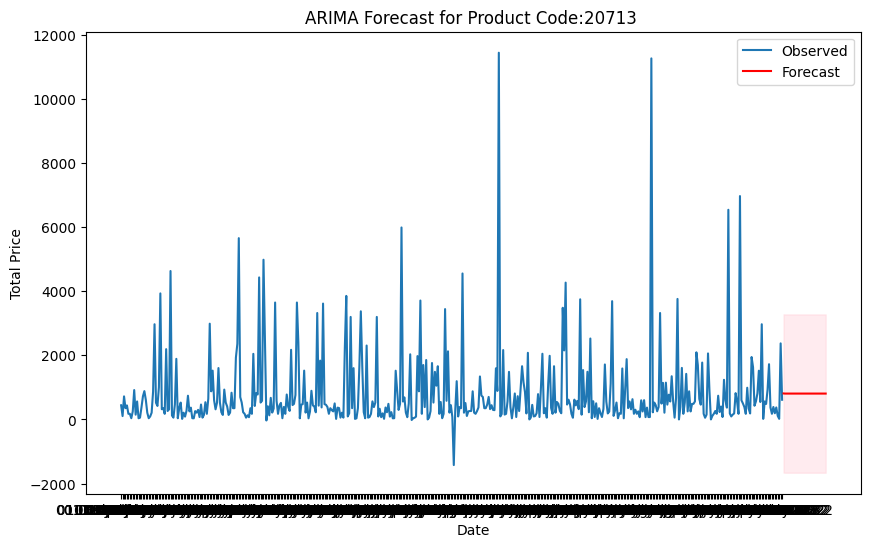

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/st

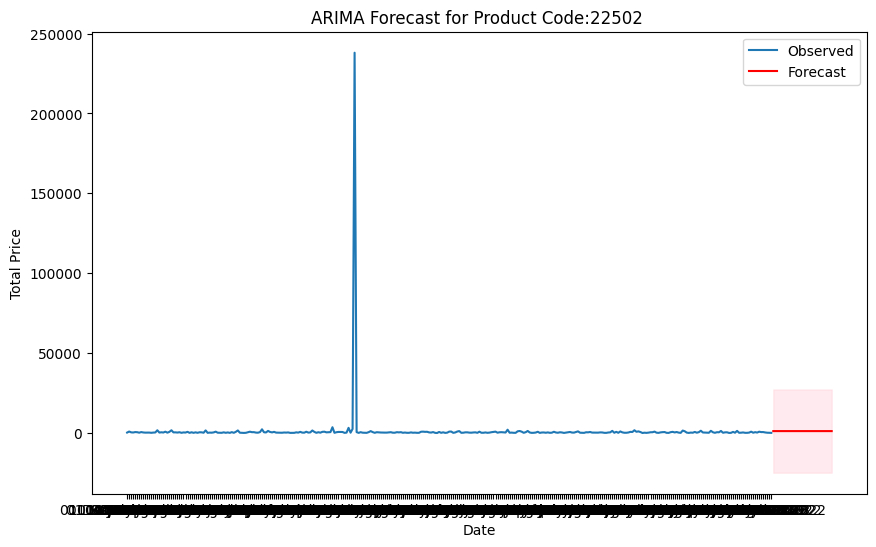

In [85]:
# for stock_code, time_series in time_series_dict.items():
#   model = ARIMA(time_series, order=(1, 1, 1))
#   arima_result = model.fit()
#   forecast = arima_result.get_forecast(steps=30)
#   forecast_ci = forecast.conf_int()

#   plt.figure(figsize=(10, 6))
#   plt.plot(time_series, label='Observed')
#   plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#   plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
#   plt.title(f'ARIMA Forecast for Product Code:{stock_code} ')
#   plt.xlabel('Date')
#   plt.ylabel('Total Price')
#   plt.legend()
#   plt.show()

In [81]:
options = [{'label': stock_code, 'value': stock_code} for stock_code in time_series_dict.keys()]

In [84]:
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("ARIMA Demand Forecasting"),
    dcc.Dropdown(
        id='stock-code-dropdown',
        options=options,
        value=list(time_series_dict.keys())[0] if time_series_dict else None,  # Default value, if dict is not empty
        placeholder="Select a stock code"
    ),
    dcc.Input(id='num-steps-input', type='number', value=30, min=1, placeholder="Number of Steps"),
    dcc.Graph(id='arima-forecast-graph'),
    html.Div(id='output-container')
])
# Define callback to update the graph based on dropdown and input
@app.callback(
    Output('arima-forecast-graph', 'figure'),
    [Input('stock-code-dropdown', 'value'),
     Input('num-steps-input', 'value')]
)
def update_graph(selected_stock, num_steps):
    if selected_stock and num_steps:
        time_series = time_series_dict[selected_stock]

        # Fit ARIMA model
        model = ARIMA(time_series, order=(1, 1, 1))
        arima_result = model.fit()
        forecast = arima_result.get_forecast(steps=num_steps)
        forecast_ci = forecast.conf_int()

        # Create figure
        figure = go.Figure()
        figure.add_trace(go.Scatter(x=time_series.index, y=time_series, mode='lines', name='Observed'))
        figure.add_trace(go.Scatter(x=forecast.predicted_mean.index, y=forecast.predicted_mean, mode='lines', name='Forecast', line=dict(color='red')))
        figure.add_trace(go.Scatter(
            x=forecast_ci.index,
            y=forecast_ci.iloc[:, 0],
            fill=None,
            mode='lines',
            line_color='lightpink',
            name='Confidence Interval'
        ))
        figure.add_trace(go.Scatter(
            x=forecast_ci.index,
            y=forecast_ci.iloc[:, 1],
            fill='tonexty',
            mode='lines',
            line_color='lightpink',
            name='Confidence Interval'
        ))

        figure.update_layout(title=f'ARIMA Forecast for {selected_stock}',
                              xaxis_title='Date',
                              yaxis_title='Total Price')
        return figure
    return go.Figure()  # Return empty figure if no stock selected

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>